# **Estimation of Obesity Levels Based on Eating Habits and Physical Condition | HubbleMind**

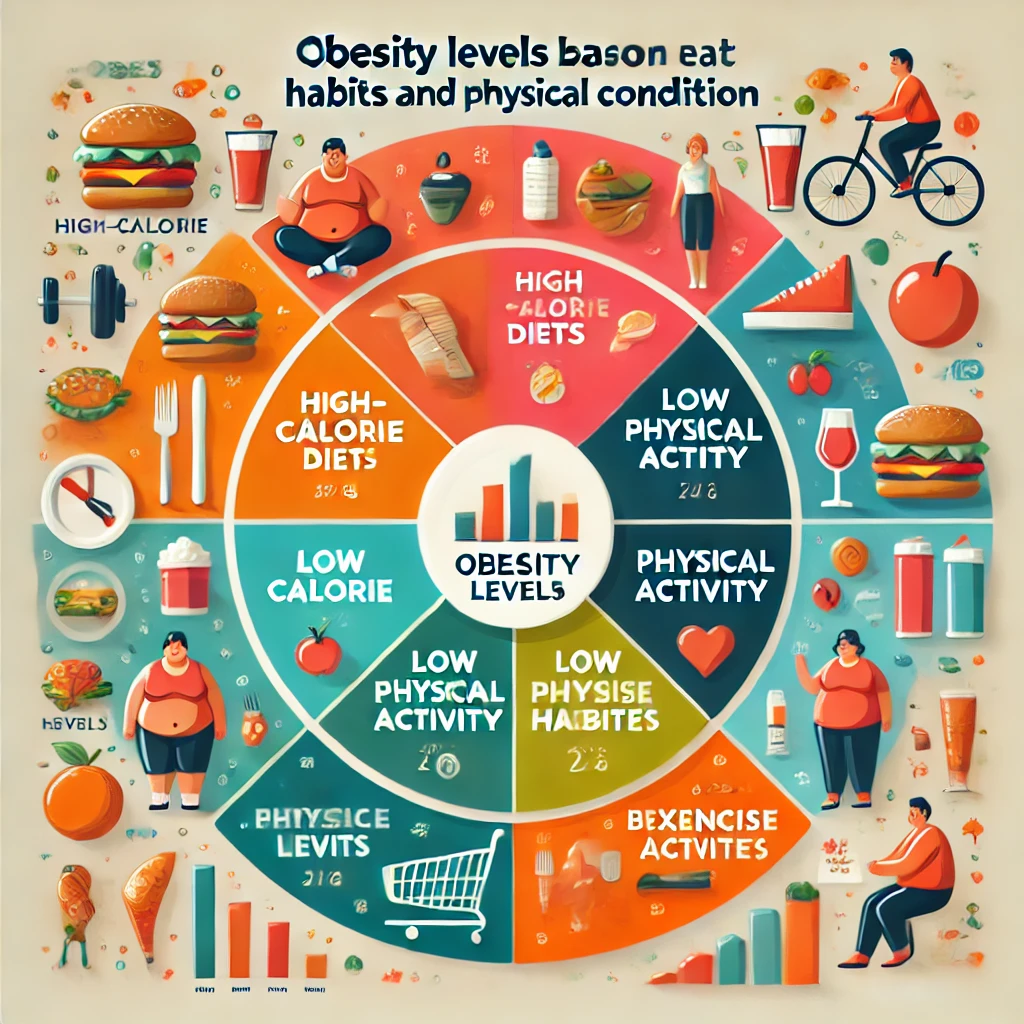


## **Project Description**

In this project, we will analyze a dataset containing health and dietary information from individuals in Mexico, Peru, and Colombia. The goal is to estimate obesity levels based on physical condition and eating habits using Python for Data Science. 



## Table of Contents
1. [Data Understanding](#data-understanding)
2. [Data Preparation](#data-preparation)
3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
4. [Advanced Visualizations](#av)
5. [Machine Learning](#ml)
6. [Model Evaluation and Reporting](#er)


## **1 | Data Understanding <a id='data-understanding'></a>**

This dataset includes data to estimate obesity levels, with 17 attributes and 2111 records. The records are labeled with a class variable NObeyesdad (Obesity Level), which categorizes individuals into several obesity levels:

● Insufficient Weight

● Normal Weight

● Overweight Level I

● Overweight Level II

● Obesity Type I

● Obesity Type II

● Obesity Type III

**Key Features:**

1. Gender (Categorical)

2. Age (Continuous): Age of the individual

3. Height (Continuous): Height in meters

4. Weight (Continuous): Weight in kilograms

5. family_history_with_overweight (Binary): Whether the individual has a family member suffering from overweight

6. FAVC (Binary): Whether the individual eats high-calorie food frequently

7. FCVC (Continuous): Frequency of vegetable consumption in meals

8. NCP (Continuous): Number of main meals consumed daily

9. CAEC (Categorical): Food consumption between meals

10. SMOKE (Binary): Whether the individual smokes

11. CH2O (Continuous): Amount of water consumed daily

12. SCC (Binary): Whether the individual monitors calorie intake

13. FAF (Continuous): Frequency of physical activity

14. TUE (Continuous): Time spent using technological devices

15. CALC (Categorical): Alcohol consumption frequency

16. MTRANS (Categorical): Mode of transportation used

**Target Feature:**

● NObeyesdad (Categorical): Obesity level categorized into 7 classes.

#####  **Import necessary libraries**  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


#####  **Load the data**

In [2]:
df=pd.read_csv("Data/ObesityDataSet_raw_and_data_sinthetic.csv")

### **1.1 | Shape Analysis**

 **First rows of the DataFrame**

In [3]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

**Column names**

In [4]:
#different existing variables
df.keys()

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

**DataFrame size**

In [5]:
df.size

35887

**DataFrame shape**

In [6]:
df.shape

(2111, 17)

**DataFrame summary**


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Here we have total 17 columns as described below with 2110 instances.

Out of which 8 column are numerical and 9 are catagorical.

**DataFrame descriptive statistics**

In [8]:
#numerical columns
df.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

Looking at above statistical analysis it is found that skewness is present in some of the columns like Age, Weight, FCOV, NMM.

Average age and weight of population is 24.31 and 86.58.

**Number of missing values**

In [9]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**Duplicate rows**

In [10]:
# Check for duplicate rows in DataFrame 'df'
duplicate_rows = df.duplicated()

# Display the duplicate rows
df[duplicate_rows]

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female  21.0    1.52    42.0                             no   no   3.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
174    Male  21.0    1.62    70.0                             no  yes   2.0   
179    Male  21.0    1.62    70.0                             no  yes   2.0   
184    Male  21.0    1.62    70.0                             no  yes   2.0   
209  Female  22.0    1.69    65.0                            yes  yes   2.0   
309  Female  16.0    1.66    58.0                             no   no   2.0   
460  Female  18.0    1.62    55.0                            yes  yes   2.0   
467    Male  22.0    1.74    75.0                            yes  yes   3.0   
496    Male  18.0    1.72    53.0                            yes  yes   2.0   
527  Female  21.0    1.52    42.0                             no  yes   3.0   
659  Female  21.0    1.52    42.0                             no  yes   3.0   
663  Female  21.0    1.52    42.0                             no  yes   3.0   
763    Male  21.0    1.62    70.0                             no  yes   2.0   
764    Male  21.0    1.62    70.0                             no  yes   2.0   
824    Male  21.0    1.62    70.0                             no  yes   2.0   
830    Male  21.0    1.62    70.0                             no  yes   2.0   
831    Male  21.0    1.62    70.0                             no  yes   2.0   
832    Male  21.0    1.62    70.0                             no  yes   2.0   
833    Male  21.0    1.62    70.0                             no  yes   2.0   
834    Male  21.0    1.62    70.0                             no  yes   2.0   
921    Male  21.0    1.62    70.0                             no  yes   2.0   
922    Male  21.0    1.62    70.0                             no  yes   2.0   
923    Male  21.0    1.62    70.0                             no  yes   2.0   

     NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
98   1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
106  1.0   Sometimes    no   2.0  no  2.0  0.0  Sometimes   
174  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
179  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
184  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
209  3.0   Sometimes    no   2.0  no  1.0  1.0  Sometimes   
309  1.0   Sometimes    no   1.0  no  0.0  1.0         no   
460  3.0  Frequently    no   1.0  no  1.0  1.0         no   
467  3.0  Frequently    no   1.0  no  1.0  0.0         no   
496  3.0   Sometimes    no   2.0  no  0.0  2.0  Sometimes   
527  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
659  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
663  1.0  Frequently    no   1.0  no  0.0  0.0  Sometimes   
763  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
764  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
824  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
830  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
831  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
832  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
833  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
834  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
921  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
922  1.0          no    no   3.0  no  1.0  0.0  Sometimes   
923  1.0          no    no   3.0  no  1.0  0.0  Sometimes   

                    MTRANS           NObeyesdad  
98   Public_Transportation  Insufficient_Weight  
106  Public_Transportation        Normal_Weight  
174  Public_Transportation   Overweight_Level_I  
179  Public_Transportation   Overweight_Level_I  
184  Public_Transportation   Overweight_Level_I  
209  Public_Transportation        Normal_Weight  
309                Walking        Normal_Weight  
460  Public_Transportation        Normal_Weight  
467             Automobile        Normal_Weight  
496

In [11]:
num_duplicates = df.duplicated().sum()
num_duplicates

24

### **1.2 | Background Analysis**

Text(0.5, 1.0, 'Distribution of Obesity Levels')

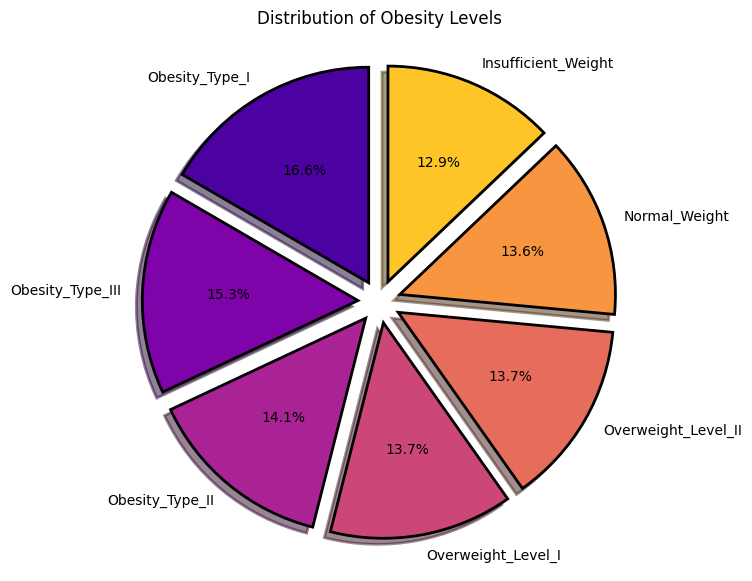

In [12]:
custom_palette = sns.color_palette("plasma", len(df['NObeyesdad'].value_counts()))
fig = plt.figure(figsize=(7,7))
colors = custom_palette
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['NObeyesdad'].value_counts()
explode = (0.1,) * len(tags)
tags.plot(kind = 'pie',autopct='%1.1f%%',shadow=True,colors=colors,
         startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of Obesity Levels')

Our target column further contains total seven catagories and all this data is well balanced so in preprocessing will use Random sampling method.

From this data analysis we conclude that the dataset has:

*   No Missing values.
*   24 Duplicate rows.
*   Data is balanced




## **2 | Data Preparation <a id='data-preparation'></a>**


##### **Drop Duplicates**

In [13]:
df.drop_duplicates(inplace=True)

##### **Label Encoding**

In [14]:
# Create a label encoder object
label_encoder = LabelEncoder()

In [15]:

# Encode labels in the 'Gender, SMOKE, FAVC, SCC' columns
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])
df['FAVC'] = label_encoder.fit_transform(df['FAVC'])
df['SCC'] = label_encoder.fit_transform(df['SCC'])
df['family_history_with_overweight'] = label_encoder.fit_transform(df['family_history_with_overweight'])

In [16]:
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP       CAEC  SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes      0   2.0    0  0.0  1.0          no   
1  3.0  Sometimes      1   3.0    1  3.0  0.0   Sometimes   
2  3.0  Sometimes      0   2.0    0  2.0  1.0  Frequently   
3  3.0  Sometimes      0   2.0    0  2.0  0.0  Frequently   
4  1.0  Sometimes      0   2.0    0  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

##### **One-hot Encoding**

In [17]:
# One-hot encoding for categorical variables 
categorical_features = ['MTRANS', 'CAEC', 'CALC']

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [18]:
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  SMOKE  CH2O  ...  MTRANS_Bike  MTRANS_Motorbike  \
0  3.0      0   2.0  ...            0                 0   
1  3.0      1   3.0  ...            0                 0   
2  3.0      0   2.0  ...            0                 0   
3  3.0      0   2.0  ...            0                 0   
4  1.0      0   2.0  ...            0                 0   

   MTRANS_Public_Transportation MTRANS_Walking  CAEC_Frequently  \
0                             1              0                0   
1                             1              0                0   
2                             1              0                0   
3                             0              1                0   
4                             1              0                0   

   CAEC_Sometimes  CAEC_no  CALC_Frequently  CALC_Sometimes  CALC_no  
0               1        0                0               0        1  
1               1        0                0               1        0  
2               1        0                1               0        0  
3               1        0                1               0        0  
4               1        0                0               1        0  

[5 rows x 24 columns]

##### **Outlier Detection and Handling**

In [19]:
# Detect outliers using boxplots
continuous_features = ['Weight', 'Height', 'Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


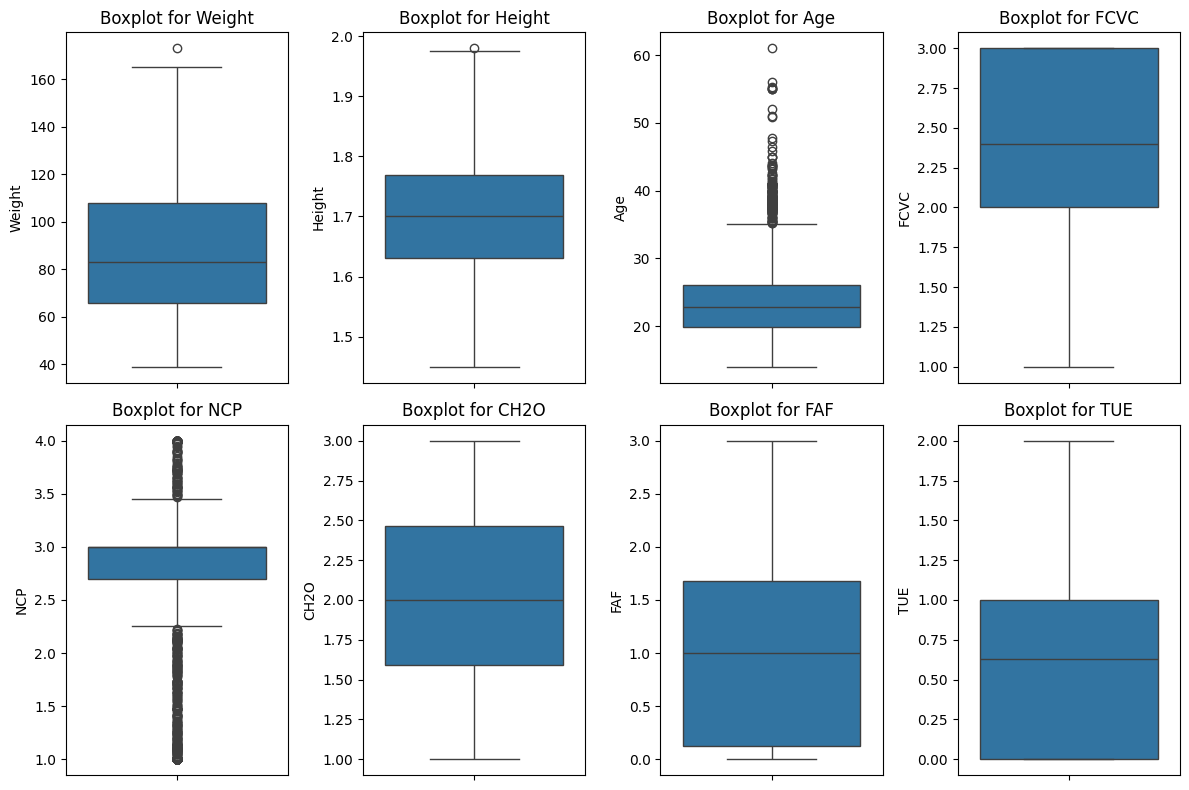

In [20]:
# Plotting boxplots to identify outliers
plt.figure(figsize=(12,8))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(df[feature])
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()



Above boxplot represent graphical visualization of outliers in dataset. 
Presence of outliers can greatly affect the performance of ML algorithms therefore it is very important to handle outliers.
- We have outliers present in number of meals(NCP), Height, weight and Age column.
- will handle outliers 

In [21]:
# Handling outliers by capping at 1.5*IQR (Interquartile Range)
for feature in continuous_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

In [22]:
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

        NCP  SMOKE  CH2O  ...  MTRANS_Bike  MTRANS_Motorbike  \
0  3.000000      0   2.0  ...            0                 0   
1  3.000000      1   3.0  ...            0                 0   
2  3.000000      0   2.0  ...            0                 0   
3  3.000000      0   2.0  ...            0                 0   
4  2.243667      0   2.0  ...            0                 0   

   MTRANS_Public_Transportation MTRANS_Walking  CAEC_Frequently  \
0                             1              0                0   
1                             1              0                0   
2                             1              0                0   
3                             0              1                0   
4                             1              0                0   

   CAEC_Sometimes  CAEC_no  CALC_Frequently  CALC_Sometimes  CALC_no  
0               1        0                0               0        1  
1               1        0                0               1        0  
2               1        0                1               0        0  
3               1        0                1               0        0  
4               1        0                0               1        0  

[5 rows x 24 columns]

##### **Normalization/Standardization**

In [23]:
# Normalizing continuous variables using MinMaxScaler
scaler = MinMaxScaler()

df[continuous_features] = scaler.fit_transform(df[continuous_features])



In [24]:
df.head()

Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0  0.331344  0.321689  0.189337                               1     0   
1       0  0.331344  0.132460  0.128749                               1     0   
2       1  0.426013  0.662301  0.287792                               1     0   
3       1  0.615353  0.662301  0.363527                               0     0   
4       1  0.378679  0.624455  0.384733                               0     0   

   FCVC    NCP  SMOKE  CH2O  ...  MTRANS_Bike  MTRANS_Motorbike  \
0   0.5  0.625      0   0.5  ...            0                 0   
1   1.0  0.625      1   1.0  ...            0                 0   
2   0.5  0.625      0   0.5  ...            0                 0   
3   1.0  0.625      0   0.5  ...            0                 0   
4   0.5  0.000      0   0.5  ...            0                 0   

   MTRANS_Public_Transportation MTRANS_Walking  CAEC_Frequently  \
0                             1              0                0   
1                             1              0                0   
2                             1              0                0   
3                             0              1                0   
4                             1              0                0   

   CAEC_Sometimes  CAEC_no  CALC_Frequently  CALC_Sometimes  CALC_no  
0               1        0                0               0        1  
1               1        0                0               1        0  
2               1        0                1               0        0  
3               1        0                1               0        0  
4               1        0                0               1        0  

[5 rows x 24 columns]

## **3 | Exploratory Data Analysis (EDA) <a id='exploratory-data-analysis'></a>**

##### **Summary Statistics**

In [25]:
# Generate summary statistics for continuous variables
print("\nSummary Statistics for Continuous Variables:\n")
df[continuous_features].describe()





Summary Statistics for Continuous Variables:



Weight       Height          Age         FCVC          NCP  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean      0.362450     0.478131     0.470977     0.710733     0.506818   
std       0.198333     0.176330     0.250982     0.267368     0.294730   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.204484     0.340949     0.280030     0.500000     0.375000   
50%       0.333999     0.476069     0.418800     0.698133     0.625000   
75%       0.522690     0.604570     0.568018     1.000000     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              CH2O          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  
mean      0.502375     0.337604     0.331518  
std       0.304142     0.284492     0.304077  
min       0.000000     0.000000     0.000000  
25%       0.295461     0.041502     0.000000  
50%       0.500000     0.333333     0.315433  
75%       0.733096     0.559367     0.500000  
max       1.000000     1.000000     1.000000

##### **Distribution Analysis**

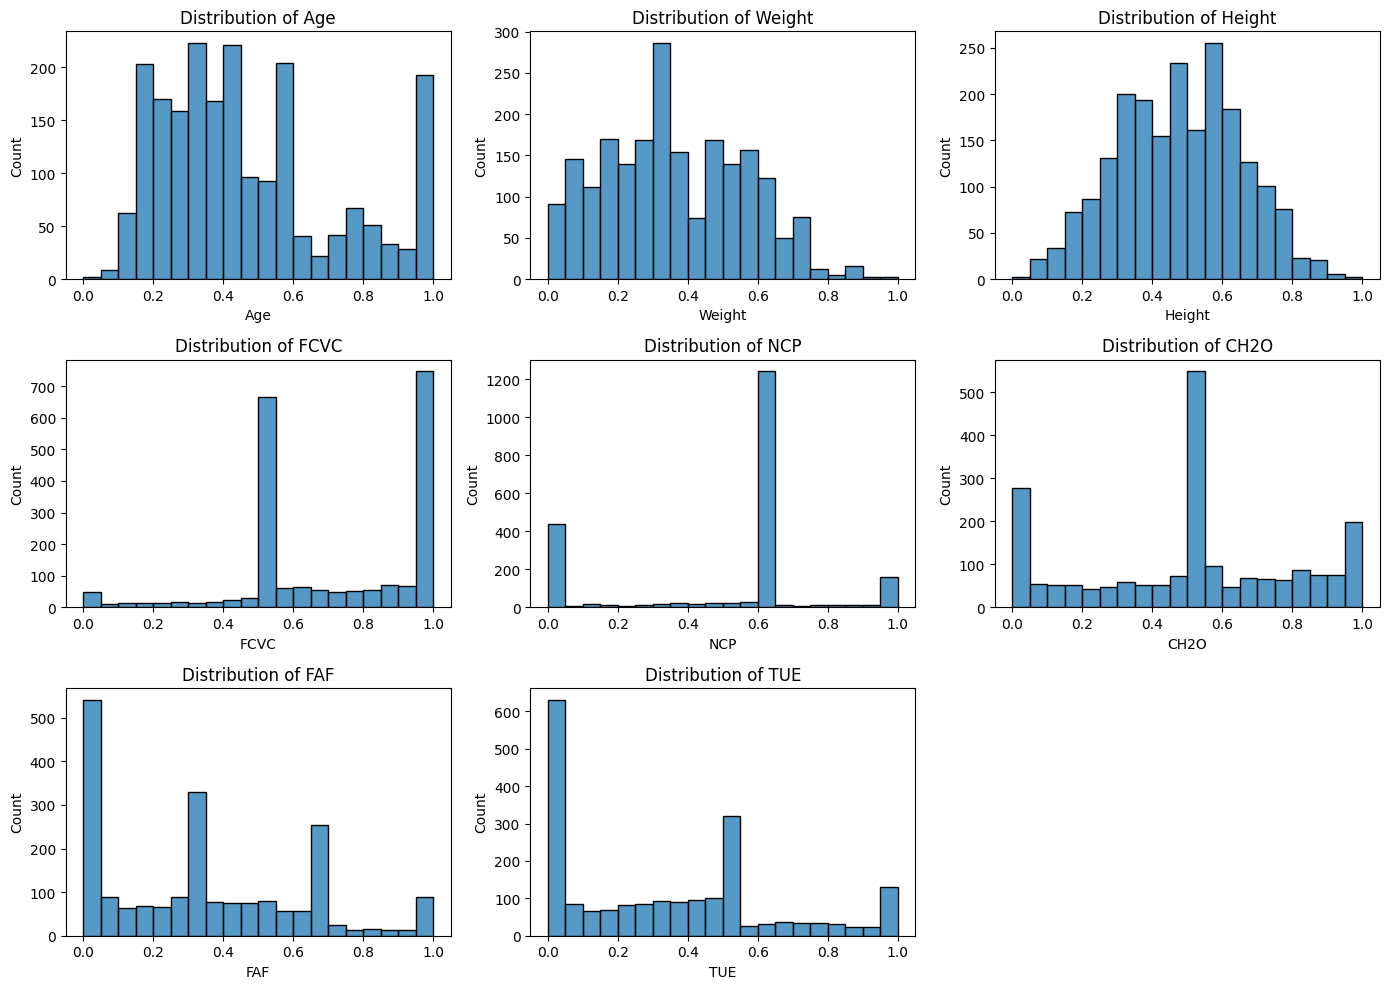

In [26]:
# Plot histograms for key variables
key_variables = ['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(key_variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=False, bins=20)  
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

The above diagrams represent frequency of each continuous value.
- we have maximum number of people between age range of 20-30.
- more than 1200 people prefer three main meals.
- Frequency of consumpion of vegetables is high.

##### **Relationship Exploration**

In [27]:
# Boxplot for FAF (physical activity frequency) vs Obesity Levels
sns.boxplot(x='NObeyesdad_Obesity_Type_I', y='FAF', data=df)
plt.title('Boxplot: FAF (Physical Activity) vs Obesity Level Type I')
plt.show()

ValueError: Could not interpret value `NObeyesdad_Obesity_Type_I` for `x`. An entry with this name does not appear in `data`.

##### **Correlation Analysis**

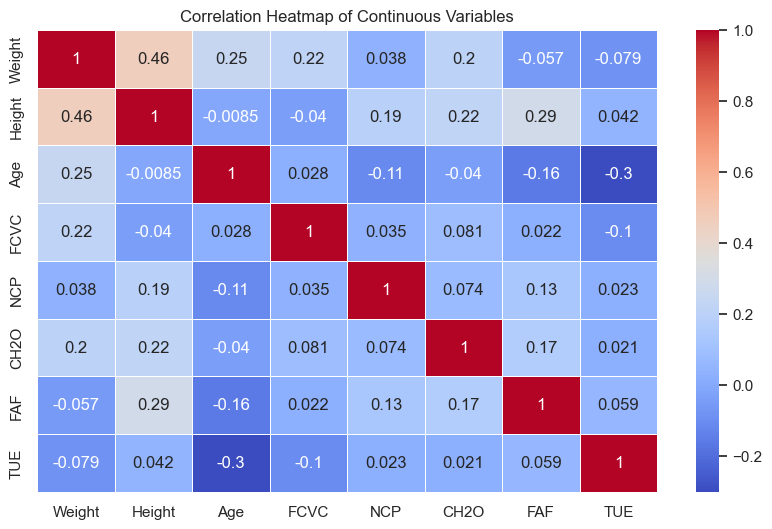

In [101]:

# Calculate the correlation matrix for continuous variables
corr_matrix = df[continuous_features].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

Above diagram represents heatmap of correlation.
- Only Height and Weight column shows good correlation.

## **4 | Advanced Visualizations <a id='av'></a>**

In [102]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

c:\Users\hafid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\hafid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\hafid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\hafid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\hafid\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

<Figure size 1200x800 with 0 Axes>

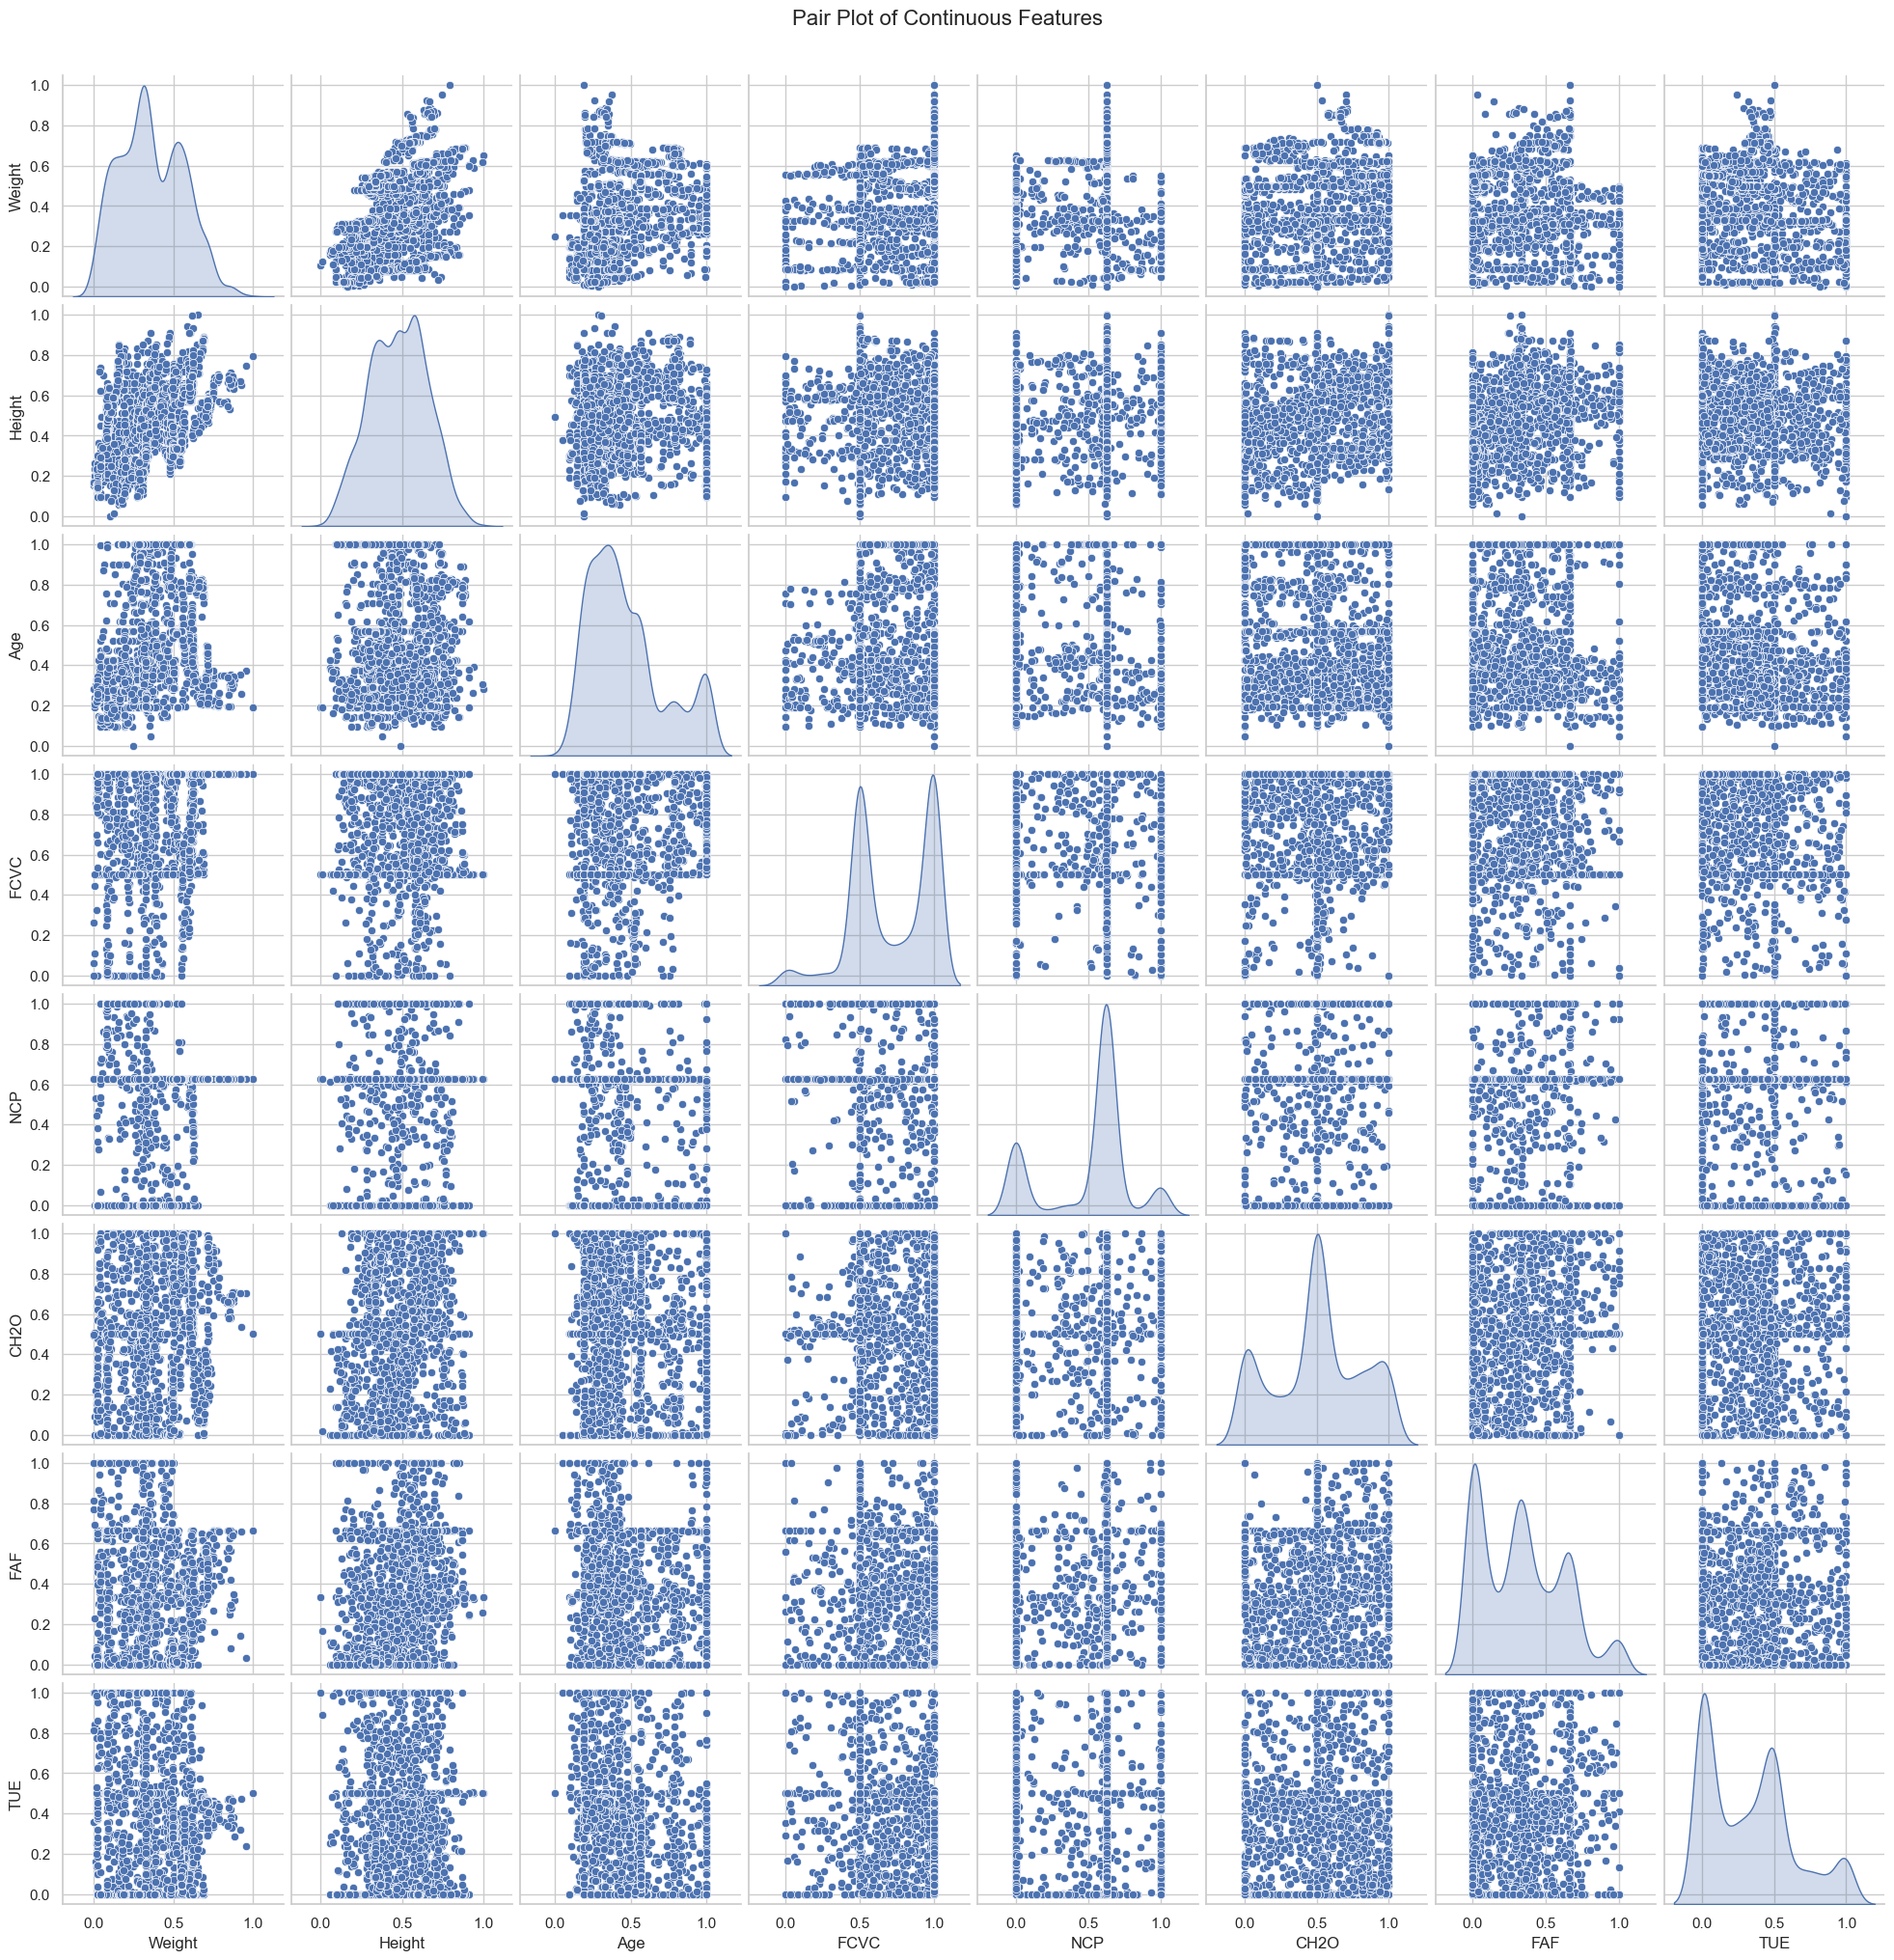

In [103]:
# 1. Pair Plot for Continuous Features
plt.figure(figsize=(12, 8))
sns.pairplot(df[continuous_features], palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot of Continuous Features', y=1.02, fontsize=16)
plt.show()

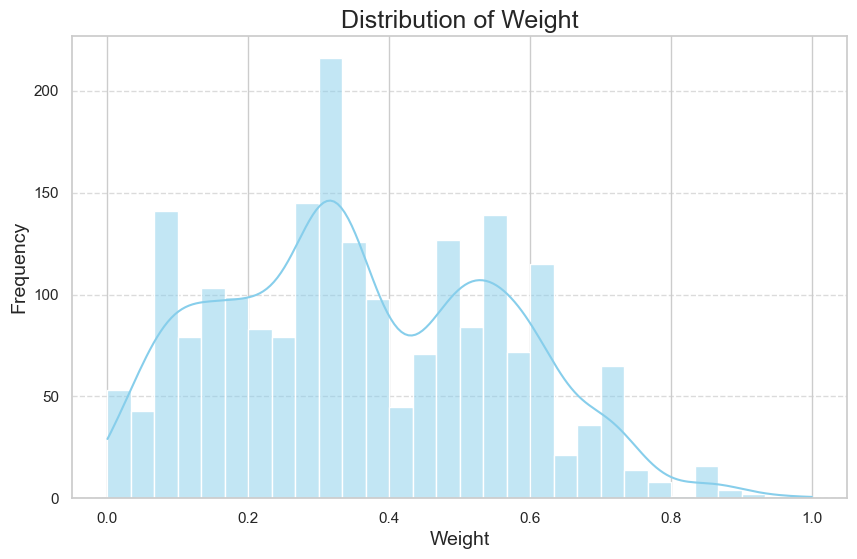

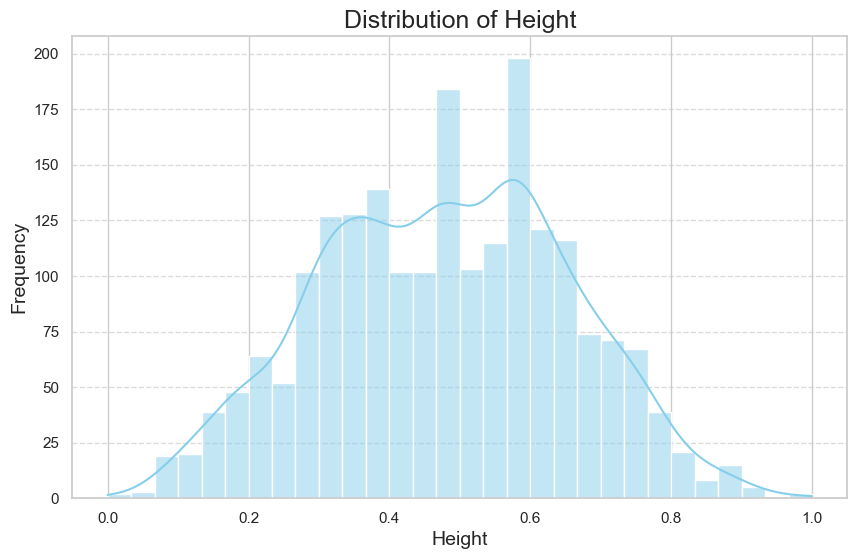

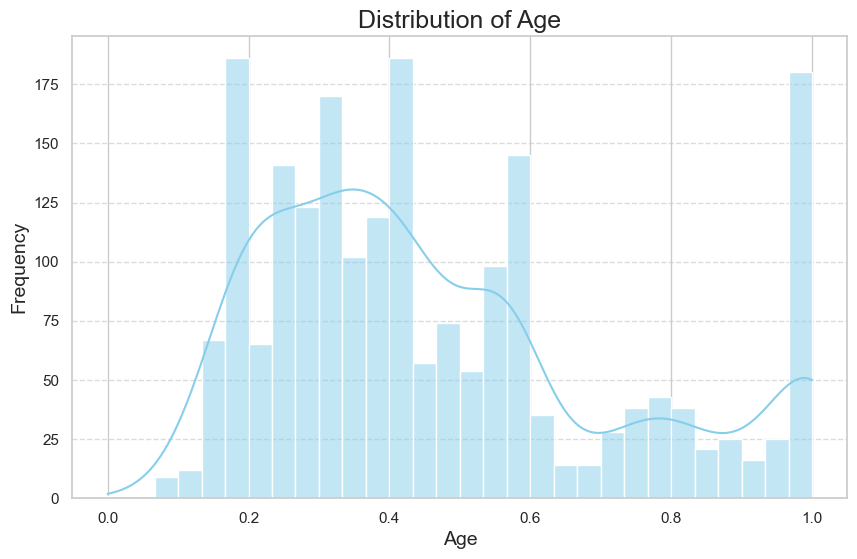

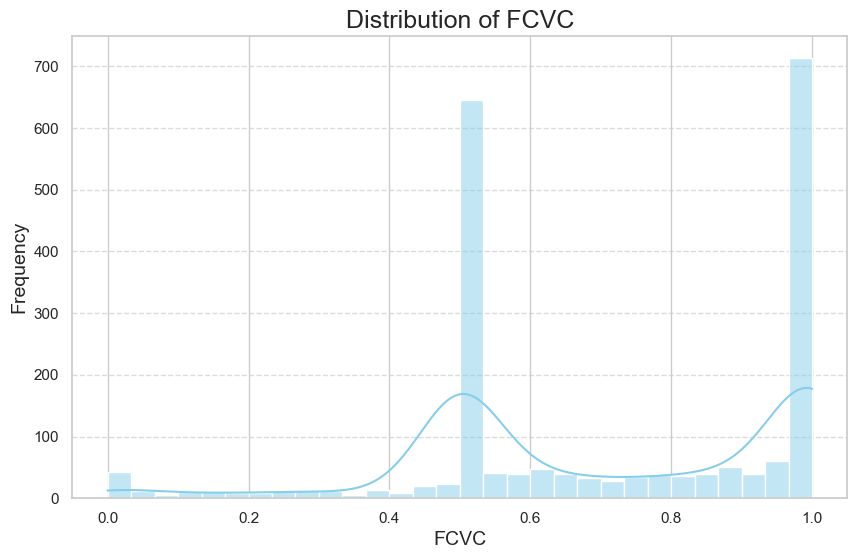

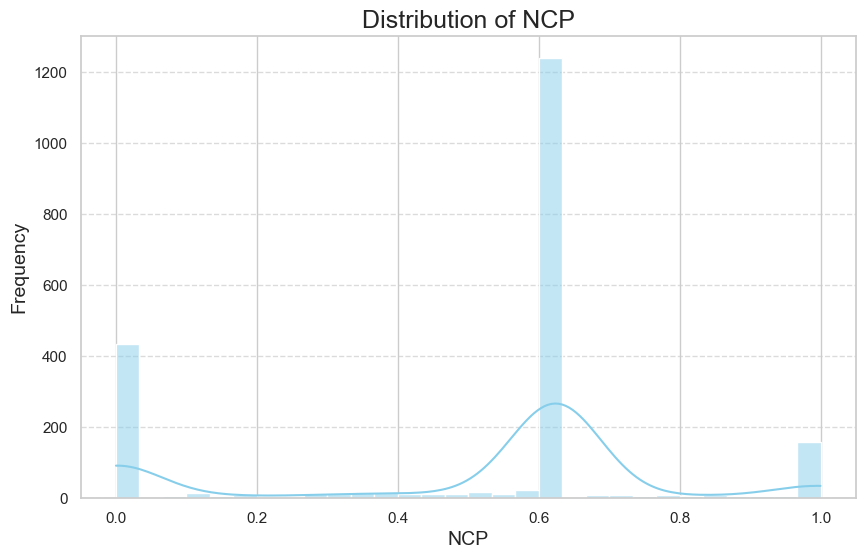

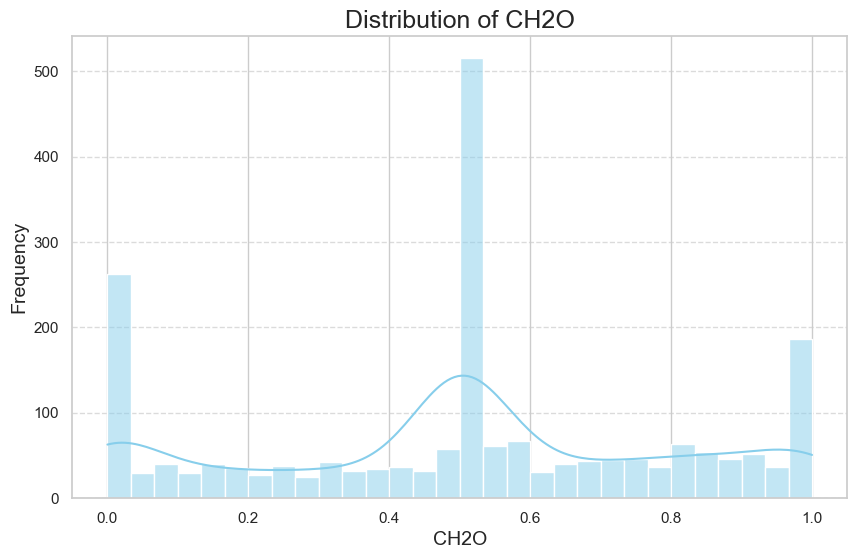

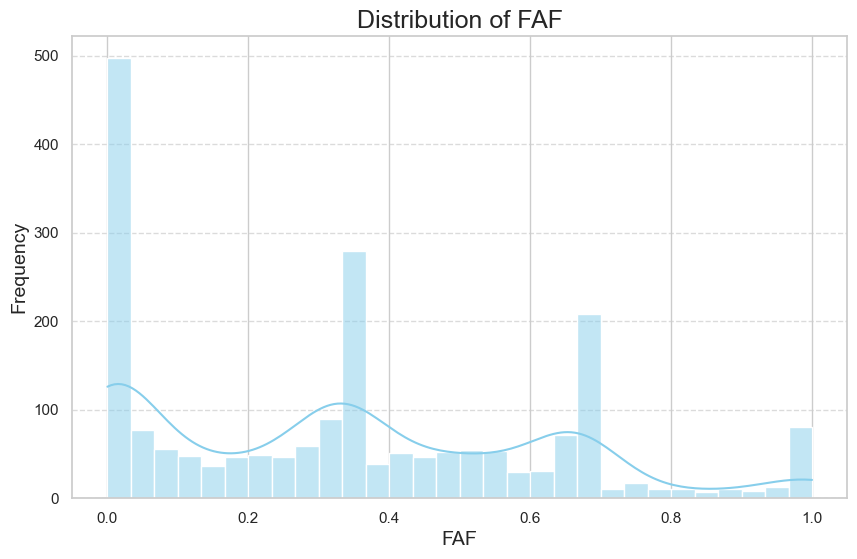

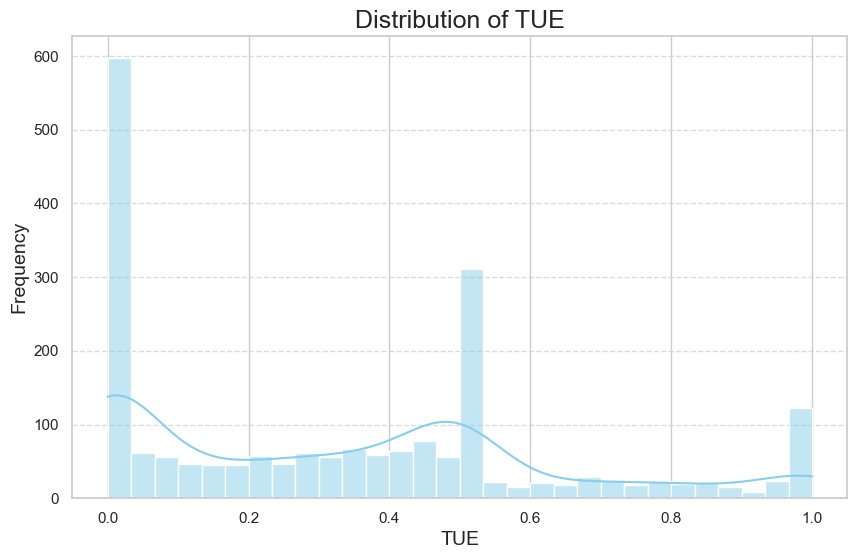

In [104]:
# 2. Distribution Plots for Continuous Features
for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=18)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

According to univariate distribution of observations it is clear 
- many features are multimodal in nature.
- Number of main meals(NCP) feature data is seems to be highly dense at one point.

C:\Users\hafid\AppData\Local\Temp\ipykernel_18328\1797510397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y=continuous_features[0], data=df, palette='Set3')


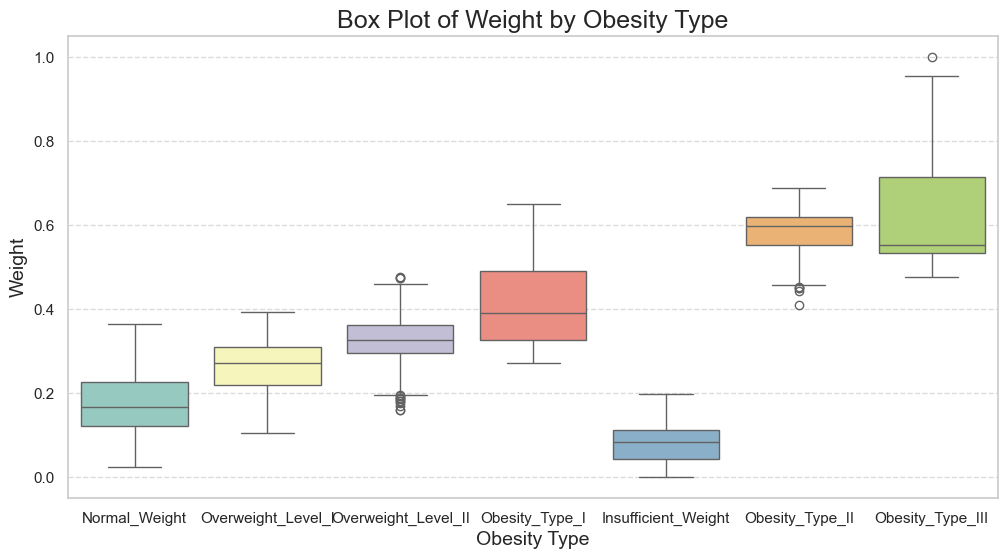

In [159]:
# 3. Box Plots to Compare Continuous Features across Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='NObeyesdad', y=continuous_features[0], data=df, palette='Set3')
plt.title(f'Box Plot of {continuous_features[0]} by Obesity Type', fontsize=18)
plt.xlabel('Obesity Type', fontsize=14)
plt.ylabel(continuous_features[0], fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\hafid\AppData\Local\Temp\ipykernel_18328\1874708957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NObeyesdad', y=feature, data=df, palette='Set2')


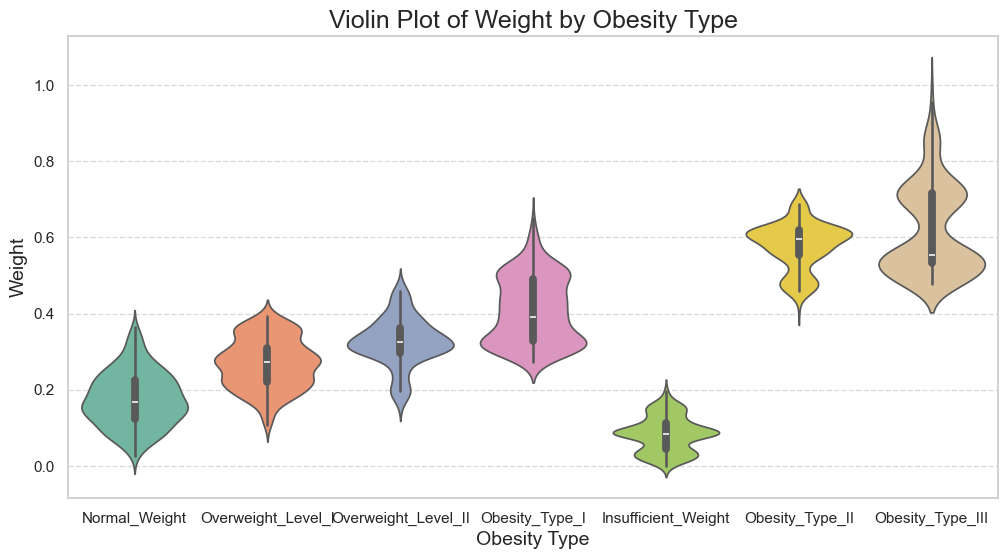

C:\Users\hafid\AppData\Local\Temp\ipykernel_18328\1874708957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NObeyesdad', y=feature, data=df, palette='Set2')


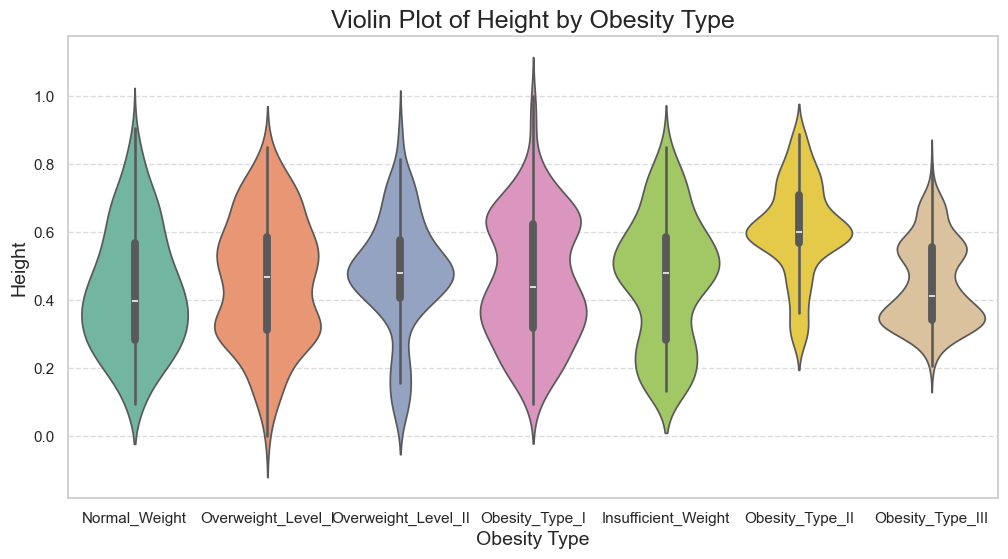

C:\Users\hafid\AppData\Local\Temp\ipykernel_18328\1874708957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NObeyesdad', y=feature, data=df, palette='Set2')


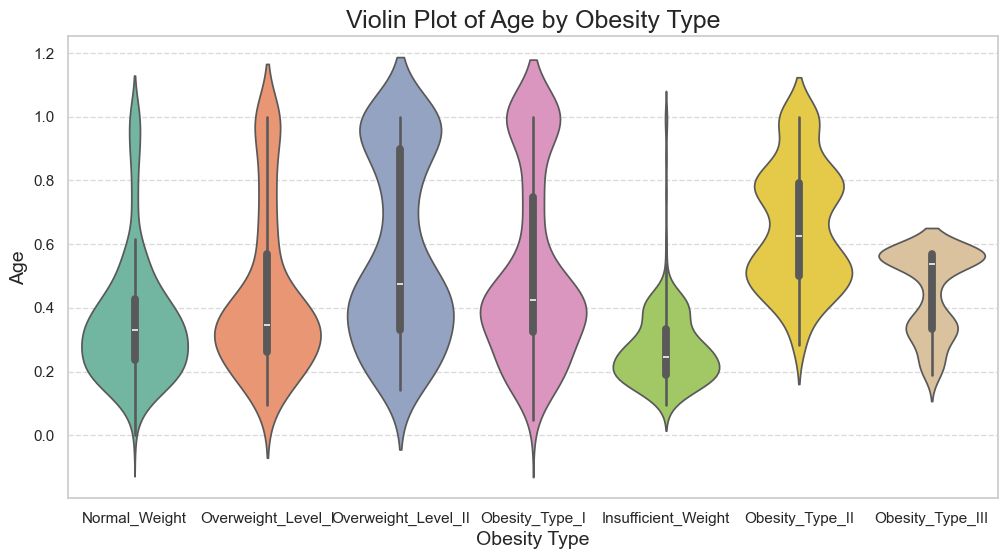

C:\Users\hafid\AppData\Local\Temp\ipykernel_18328\1874708957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NObeyesdad', y=feature, data=df, palette='Set2')


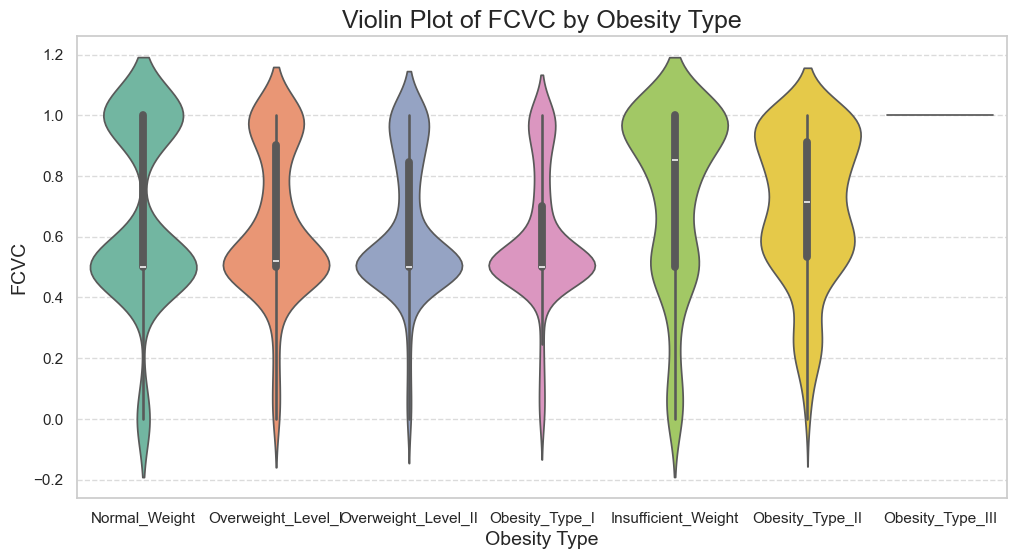

C:\Users\hafid\AppData\Local\Temp\ipykernel_18328\1874708957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NObeyesdad', y=feature, data=df, palette='Set2')


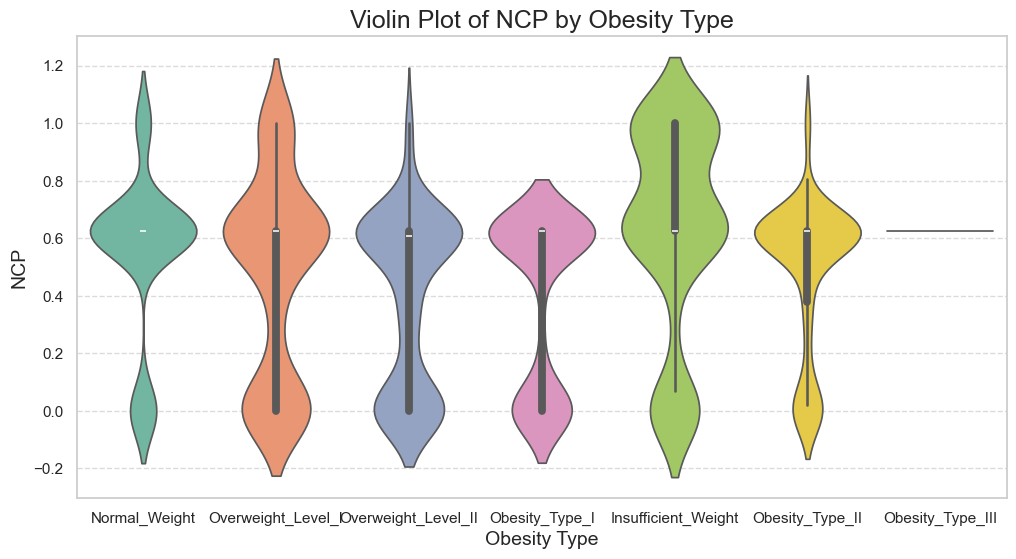

C:\Users\hafid\AppData\Local\Temp\ipykernel_18328\1874708957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NObeyesdad', y=feature, data=df, palette='Set2')


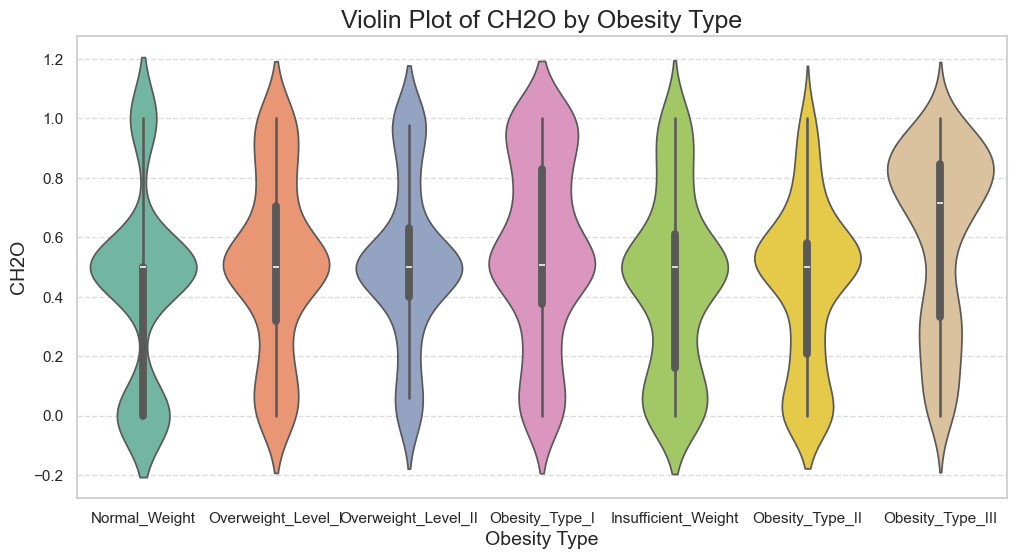

C:\Users\hafid\AppData\Local\Temp\ipykernel_18328\1874708957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NObeyesdad', y=feature, data=df, palette='Set2')


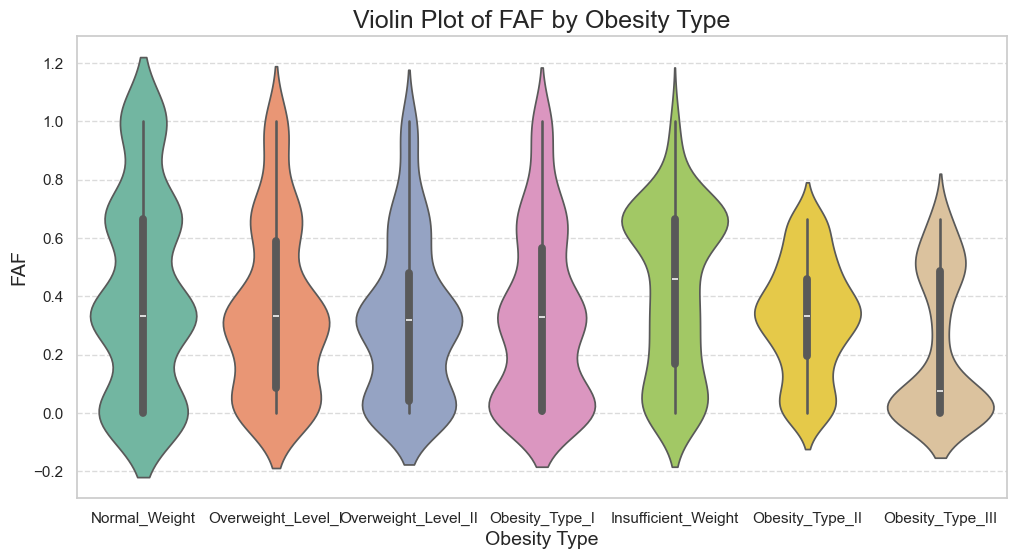

C:\Users\hafid\AppData\Local\Temp\ipykernel_18328\1874708957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NObeyesdad', y=feature, data=df, palette='Set2')


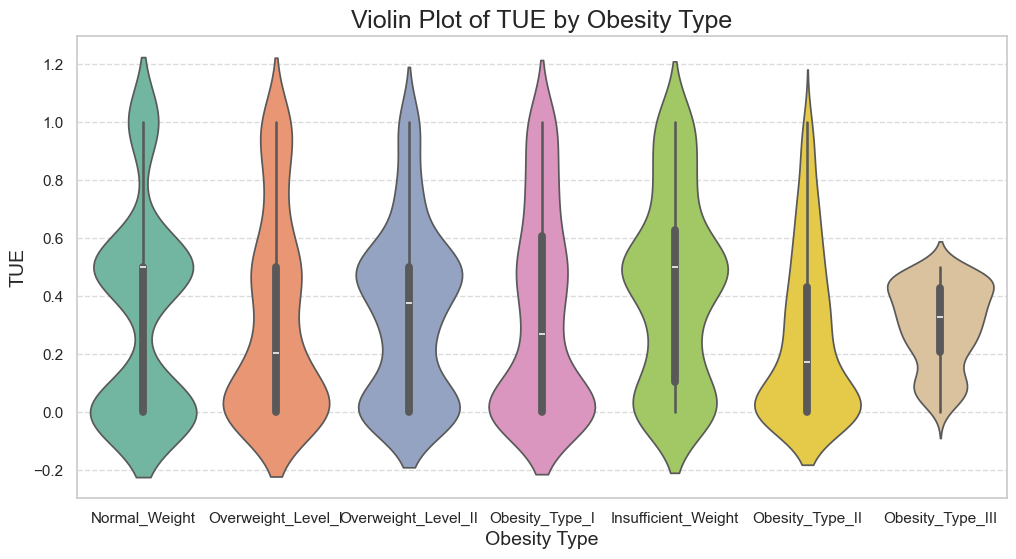

In [158]:
for feature in continuous_features:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='NObeyesdad', y=feature, data=df, palette='Set2')
    plt.title(f'Violin Plot of {feature} by Obesity Type', fontsize=18)
    plt.xlabel('Obesity Type', fontsize=14)
    plt.ylabel(feature, fontsize=14)  # Use specific feature for the y-label
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    

##### **Feature Distribution by Obesity Level**

In [30]:
import plotly.express as px
# Key features: Age, Weight, Height, FCVC (vegetable consumption), NCP (main meals)

features_to_plot = ['Age', 'Weight', 'Height', 'FCVC', 'NCP']

# Plotly for Interactive Visualization
for feature in features_to_plot:
    fig = px.violin(df, y=feature, x='NObeyesdad', color='NObeyesdad', 
                    box=True, points="all", 
                    title=f'{feature} Distribution by Obesity Level')
    fig.update_layout(yaxis_title=feature, xaxis_title="Obesity Level")
    fig.show()




In [32]:
df

Gender       Age    Height    Weight  family_history_with_overweight  \
0          0  0.331344  0.321689  0.189337                               1   
1          0  0.331344  0.132460  0.128749                               1   
2          1  0.426013  0.662301  0.287792                               1   
3          1  0.615353  0.662301  0.363527                               0   
4          1  0.378679  0.624455  0.384733                               0   
...      ...       ...       ...       ...                             ...   
2106       0  0.330248  0.493376  0.699854                               1   
2107       0  0.377871  0.565007  0.717533                               1   
2108       0  0.403484  0.571861  0.717128                               1   
2109       0  0.490480  0.547723  0.714532                               1   
2110       0  0.457477  0.546561  0.715486                               1   

      FAVC  FCVC    NCP  SMOKE      CH2O  ...  MTRANS_Bike  MTRANS_Motorbike  \
0        0   0.5  0.625      0  0.500000  ...            0                 0   
1        0   1.0  0.625      1  1.000000  ...            0                 0   
2        0   0.5  0.625      0  0.500000  ...            0                 0   
3        0   1.0  0.625      0  0.500000  ...            0                 0   
4        0   0.5  0.000      0  0.500000  ...            0                 0   
...    ...   ...    ...    ...       ...  ...          ...               ...   
2106     1   1.0  0.625      0  0.364070  ...            0                 0   
2107     1   1.0  0.625      0  0.502565  ...            0                 0   
2108     1   1.0  0.625      0  0.527097  ...            0                 0   
2109     1   1.0  0.625      0  0.926170  ...            0                 0   
2110     1   1.0  0.625      0  0.931757  ...            0                 0   

      MTRANS_Public_Transportation MTRANS_Walking  CAEC_Frequently  \
0                                1              0                0   
1                                1              0                0   
2                                1              0                0   
3                                0              1                0   
4                                1              0                0   
...                            ...            ...              ...   
2106                             1              0                0   
2107                             1              0                0   
2108                             1              0                0   
2109                             1              0                0   
2110                             1              0                0   

      CAEC_Sometimes  CAEC_no  CALC_Frequently  CALC_Sometimes  CALC_no  
0                  1        0                0               0        1  
1                  1        0                0               1        0  
2                  1        0                1               0        0  
3                  1        0                1               0        0  
4                  1        0                0               1        0  
...              ...      ...              ...             ...      ...  
2106               1        0                0               1        0  
2107               1        0                0               1        0  
2108               1        0                0               1        0  
2109               1        0                0               1        0  
2110               1        0                0               1        0  

[2087 rows x 24 columns]

##### **Eating Habits Analysis: Caloric Intake Patterns**

In [34]:


# Features related to caloric intake
caloric_features = ['FAVC', 'NCP', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no']

# Plotly for Interactive Visualization
for feature in caloric_features:
    fig = px.box(df, y=feature, x='NObeyesdad', color='NObeyesdad', 
                 title=f'{feature} Patterns across Obesity Levels')
    fig.update_layout(yaxis_title=feature, xaxis_title="Obesity Level")
    fig.show()


##### **Scatterplot of how obesity varies with Physical activity and Age**

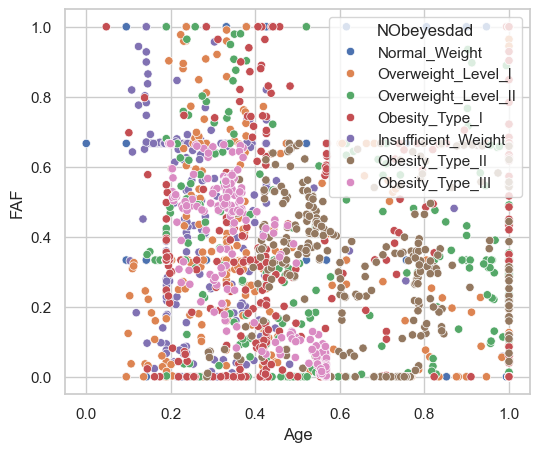

In [151]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age', y='FAF',data=df, hue = 'NObeyesdad')
plt.show()

- People who are not doing any physical activity are suffering from both overweight and obesity.
- Obesity type III is most frequent in young population between age 15-30.
- We can see that obesity type II is only present in people having age avove 20.

##### **Variation of obesity according to Weight and Age**

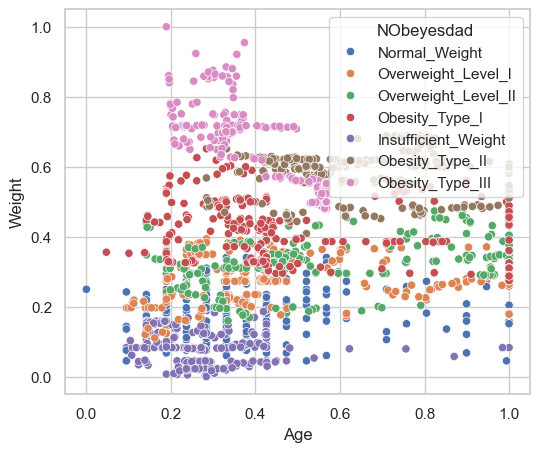

In [153]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age', y='Weight',data=df, hue = 'NObeyesdad')
plt.show()

##### **Variation of obesity according to Weight and Height**

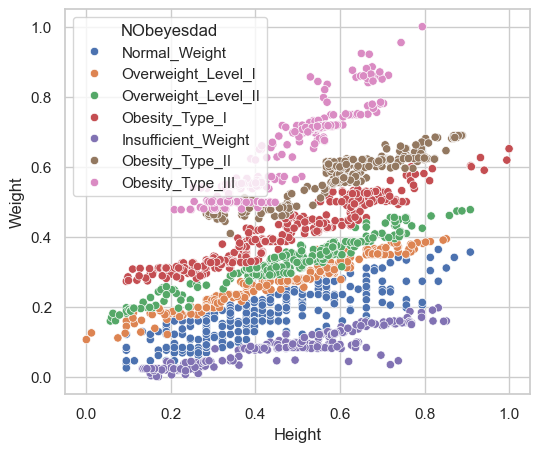

In [154]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Height', y='Weight',data=df, hue = 'NObeyesdad')
plt.show()

## **5 | Machine Learning <a id='ml'></a>**

##### **Feature Engineering and Scaling**

In [136]:
# Perform necessary feature scaling
X = df.drop(columns=['NObeyesdad'])  
y = df['NObeyesdad']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Only scale the features

##### **Train-Test Split**

In [137]:
# Split the data into training (80%) and testing (20%) sets
from sklearn.model_selection import StratifiedShuffleSplit



# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



##### **Machine Learning Model Implementation**

In [138]:
# 1. Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)




c:\Users\hafid\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [139]:
# 2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [140]:
# 3. Support Vector Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)



SVC(random_state=42)

In [141]:
# 4. K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)



KNeighborsClassifier()

In [142]:
# 5. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## **6 | Model Evaluation and Reporting <a id='er'></a>**

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate model performance
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': conf_matrix
    }



In [144]:
results = []

# Evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
results.append(evaluate_model(y_test, y_pred_log_reg, "Logistic Regression"))

# Evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))

# Evaluate Support Vector Classifier
y_pred_svm = svm_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_svm, "Support Vector Classifier"))

# Evaluate K-Nearest Neighbors
y_pred_knn = knn_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors"))

# Evaluate Decision Tree
y_pred_dt = dt_model.predict(X_test)
results.append(evaluate_model(y_test, y_pred_dt, "Decision Tree"))





Evaluation Metrics for Logistic Regression:
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1 Score: 0.74

Confusion Matrix for Logistic Regression:
[[50  7  0  0  0  2  0]
 [15 25  3  0  0 14  4]
 [ 0  0 50  7  2  4  7]
 [ 0  0  0 63  0  0  1]
 [ 0  0  0  0 60  0  0]
 [ 0  6  7  1  0 31 10]
 [ 0  4  8  1  0  4 32]]


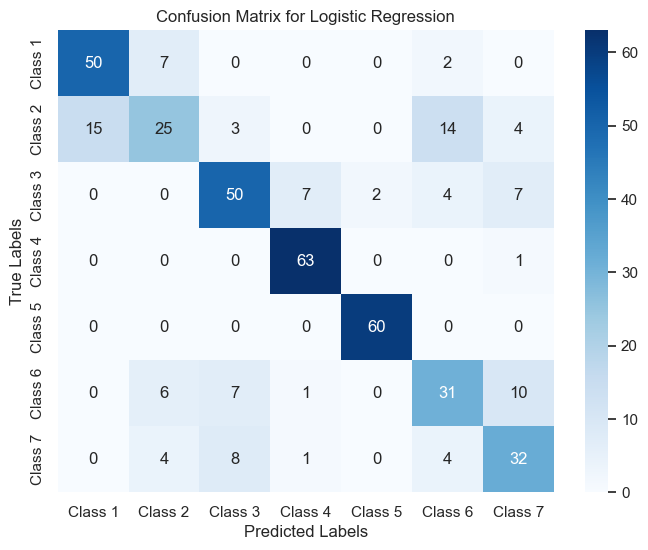


Evaluation Metrics for Random Forest:
Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1 Score: 0.94

Confusion Matrix for Random Forest:
[[54  5  0  0  0  0  0]
 [ 2 55  0  0  0  2  2]
 [ 0  1 67  0  0  1  1]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  5  0  0  0 47  3]
 [ 0  2  0  0  0  0 47]]


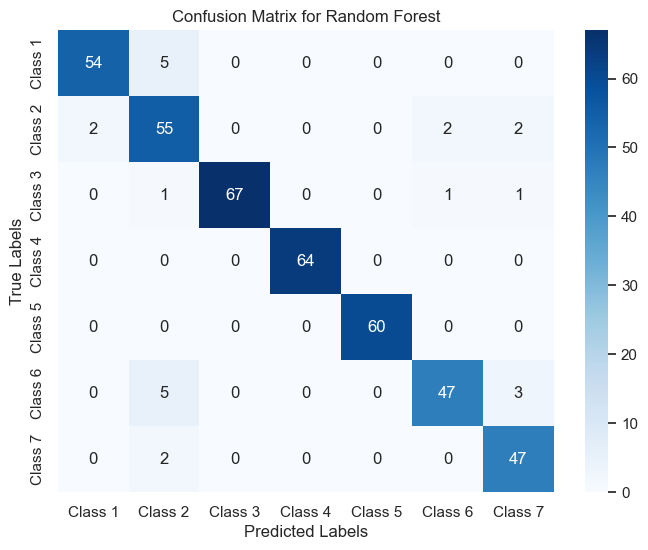


Evaluation Metrics for Support Vector Classifier:
Accuracy: 0.80
Precision: 0.79
Recall: 0.80
F1 Score: 0.80

Confusion Matrix for Support Vector Classifier:
[[48 10  0  0  0  1  0]
 [ 7 39  5  0  0  7  3]
 [ 0  2 55  6  0  3  4]
 [ 0  0  0 63  0  0  1]
 [ 0  0  0  0 60  0  0]
 [ 2  4  7  0  0 35  7]
 [ 0  6  6  0  0  4 33]]


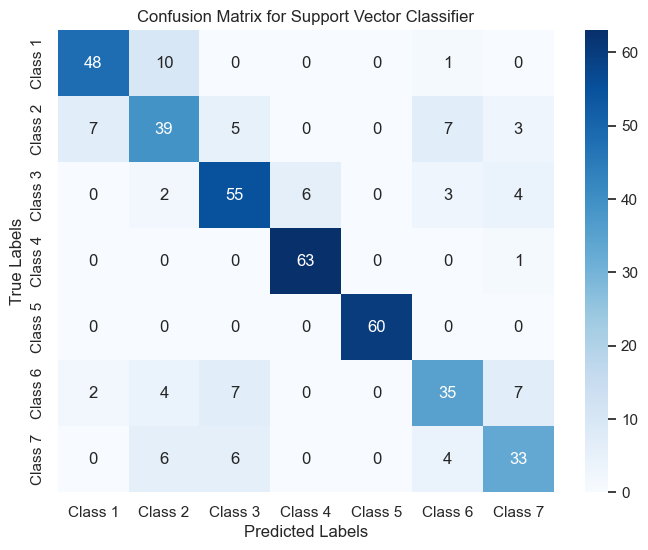


Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.80
Precision: 0.79
Recall: 0.80
F1 Score: 0.79

Confusion Matrix for K-Nearest Neighbors:
[[52  5  0  0  0  1  1]
 [15 24  9  3  0  3  7]
 [ 1  1 63  1  0  1  3]
 [ 0  0  0 62  0  0  2]
 [ 0  0  0  0 60  0  0]
 [ 1  5  5  1  0 37  6]
 [ 1  4  7  1  0  1 35]]


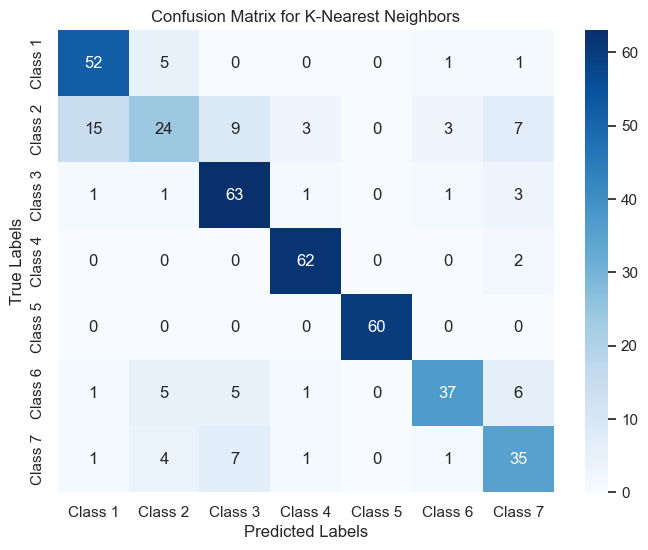


Evaluation Metrics for Decision Tree:
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92

Confusion Matrix for Decision Tree:
[[58  1  0  0  0  0  0]
 [ 7 44  0  0  0 10  0]
 [ 0  0 65  3  0  0  2]
 [ 0  0  2 62  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  6  1  0  0 48  0]
 [ 0  0  1  0  0  0 48]]


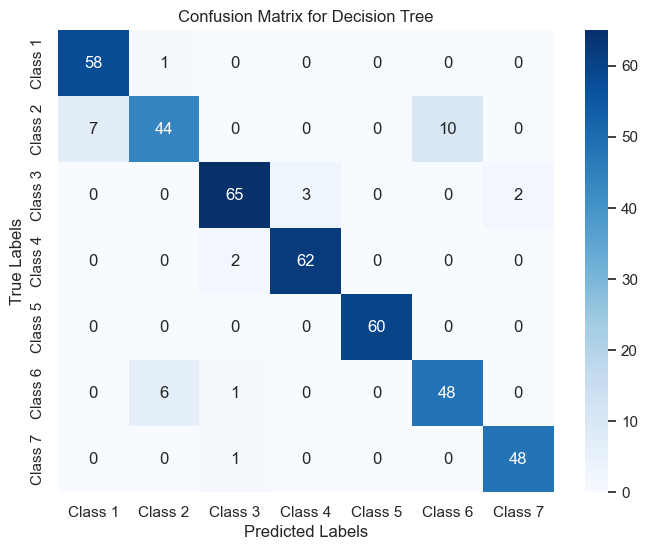

In [146]:
# Create DataFrame to display results
results_df = pd.DataFrame(results)

# Display the detailed evaluation metrics and plot confusion matrices
for index, result in results_df.iterrows():
    print(f"\nEvaluation Metrics for {result['Model']}:")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    
    # Print Confusion Matrix in normal format
    print(f"\nConfusion Matrix for {result['Model']}:")
    print(result['Confusion Matrix'])

    cm = result['Confusion Matrix']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Class {i+1}' for i in range(cm.shape[1])],
                yticklabels=[f'Class {i+1}' for i in range(cm.shape[0])])
    plt.title(f'Confusion Matrix for {result["Model"]}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()



In [147]:
# Create a summary table for model comparison
comparison_table = results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']]

# Display the summary comparison table
print("\nSummary of Model Evaluations:")
print(comparison_table)


Summary of Model Evaluations:
                       Model  Accuracy  Precision    Recall  F1 Score
0        Logistic Regression  0.744019   0.735087  0.744019  0.736062
1              Random Forest  0.942584   0.945895  0.942584  0.943269
2  Support Vector Classifier  0.796651   0.794369  0.796651  0.795005
3        K-Nearest Neighbors  0.796651   0.792595  0.796651  0.787252
4              Decision Tree  0.921053   0.920620  0.921053  0.919497


## Conclusion

The **Random Forest** model achieved the best performance, demonstrating exceptional accuracy, precision, recall, and F1 score. It effectively classified the majority of instances with high reliability. The **Decision Tree** model also performed admirably, showing strong classification metrics but slightly trailing behind **Random Forest** in overall effectiveness.

The **Support Vector Classifier (SVC)** and **K-Nearest Neighbors (KNN)** exhibited comparable performance, indicating decent classification capabilities but lacking the robustness of the top models.

In contrast, **Logistic Regression** fell short in all metrics, especially in accuracy and F1 score, making it the least suitable choice for this analysis.

-------------- Realized by Hidani Hafida